# Assignment \#7

### Import Libraries

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

### Import Data

#### Display current directory

In [2]:
os.getcwd()

'C:\\Users\\HaChoi\\School'

#### Access directory with the data files

In [3]:
path = os.chdir(r"C:\Users\HaChoi\Documents\Admin\School\Classes\DATA690\Assignment7\CollegeScorecard_Raw_Data") 

#### Display list of files in the folder

In [4]:
files = os.listdir()

files

['.DS_Store',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

#### Only display the data files

In [5]:
csv_files = [x for x in files if "MERGED" in x]

csv_files

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

#### Import all data files into a dataframe.

Only import the following columns:
- *UNITID* - Unit ID for institution
- *INSTNM* - Institution name
- *STABBR* - State postcode
- *REGION* - Institution's region
  - 0: U.S. Service Schools
  - 1: New England (CT, ME, MA, NH, RI, VT)
  - 2: Mid East (DE, DC, MD, NJ, NY, PA)
  - 3: Great Lakes (IL, IN, MI, OH, WI)
  - 4: Plains (IA, KS, MN, MO, NE, ND, SD)
  - 5: Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)
  - 6: Southwest (AZ, NM, OK, TX)
  - 7: Rocky Mountains (CO, ID, MT, UT, WY)
  - 8: Far West (AK, CA, HI, NV, OR, WA)
  - 9: Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)
- *ADM_RATE* - Admission rate
- *TUITIONFEE_IN* - In-state tuition and fees
- *YEAR* - Admission year

In [6]:
raw_data = []

for file in csv_files:
    df = (pd.read_csv(file, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]))
    df['YEAR'] = file
    raw_data.append(df)

all_data = pd.concat(raw_data)

all_data.shape

(163331, 7)

In [7]:
# display sample data

all_data.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
5761,439288,Johnson & Wales University-Denver,CO,7.0,0.7137,23490.0,MERGED2009_10_PP.csv
6599,409388,ALLEN MEMORIAL HOSPITAL RADIOLOGIC TECHNOLOGY SCH,IA,4.0,NaN,NaN,MERGED1996_97_PP.csv
328,111230,CALIFORNIA PARAMEDICAL AND TECHNICAL COLLEGE,CA,8.0,NaN,NaN,MERGED1997_98_PP.csv
4458,423652,Oregon Coast Community College,OR,8.0,NaN,4446.0,MERGED2018_19_PP.csv
1082,144218,City Colleges of Chicago-Wilbur Wright College,IL,3.0,NaN,3070.0,MERGED2011_12_PP.csv


### Cleanse Data

#### Create dictionary for the admission years

In [8]:
year_dict = {
    'MERGED1996_97_PP.csv': 1996, 
    'MERGED1997_98_PP.csv': 1997,
    'MERGED1998_99_PP.csv': 1998,
    'MERGED1999_00_PP.csv': 1999,
    'MERGED2000_01_PP.csv': 2000,
    'MERGED2001_02_PP.csv': 2001,
    'MERGED2002_03_PP.csv': 2002,
    'MERGED2003_04_PP.csv': 2003,
    'MERGED2004_05_PP.csv': 2004,
    'MERGED2005_06_PP.csv': 2005,
    'MERGED2006_07_PP.csv': 2006,
    'MERGED2007_08_PP.csv': 2007,
    'MERGED2008_09_PP.csv': 2008,
    'MERGED2009_10_PP.csv': 2009,
    'MERGED2010_11_PP.csv': 2010,
    'MERGED2011_12_PP.csv': 2011,
    'MERGED2012_13_PP.csv': 2012,
    'MERGED2013_14_PP.csv': 2013,
    'MERGED2014_15_PP.csv': 2014,
    'MERGED2015_16_PP.csv': 2015,
    'MERGED2016_17_PP.csv': 2016,
    'MERGED2017_18_PP.csv': 2017,
    'MERGED2018_19_PP.csv': 2018} 

#### Update the "Year" column with corresponding admission year

In [9]:
yearly_data = all_data.replace({'YEAR': year_dict})

yearly_data

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996
...,...,...,...,...,...,...,...
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018


#### Create dictionary for Region

In [10]:
region_dict = {
    0: 'U.S. Service Schools',
    1: 'New England (CT, ME, MA, NH, RI, VT)',
    2: 'Mid East (DE, DC, MD, NJ, NY, PA)',
    3: 'Great Lakes (IL, IN, MI, OH, WI)',
    4: 'Plains (IA, KS, MN, MO, NE, ND, SD)',
    5: 'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
    6: 'Southwest (AZ, NM, OK, TX)',
    7: 'Rocky Mountains (CO, ID, MT, UT, WY)',
    8: 'Far West (AK, CA, HI, NV, OR, WA)',
    9: 'Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)'
}

#### Update the "Region" column with corresponding region

In [11]:
df = yearly_data.replace({'REGION': region_dict})

df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
391,119137,Moorpark College,CA,"Far West (AK, CA, HI, NV, OR, WA)",NaN,1388.0,2017
1226,148593,St. John's College-Department of Nursing,IL,"Great Lakes (IL, IN, MI, OH, WI)",NaN,NaN,2008
2569,178305,Missouri College,MO,"Plains (IA, KS, MN, MO, NE, ND, SD)",NaN,NaN,1998
2484,178448,Moberly Area Community College,MO,"Plains (IA, KS, MN, MO, NE, ND, SD)",NaN,1360.0,2000
4364,365833,Ross Medical Education Center-Kentwood,MI,"Great Lakes (IL, IN, MI, OH, WI)",NaN,NaN,2015


### Data exploration 

#### Find null values in each column

In [12]:
# display all rows with null values 

df.isna().sum()

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118420
TUITIONFEE_IN     84137
YEAR                  0
dtype: int64

In [13]:
# display data with null region

df[df['REGION'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
7726,45712901,Chamberlain College of Nursing-Miramar Campus,FL,NaN,NaN,NaN,2011


In [14]:
# display data with null admission rate 

df[df['ADM_RATE'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,U.S. Service Schools,NaN,NaN,1996
1,100654,Alabama A & M University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
4,100690,Amridge University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
...,...,...,...,...,...,...,...
6801,48511112,Georgia Military College - Dublin,GA,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,21420.0,2018


In [15]:
# display data with null in-state tuition

df[df['TUITIONFEE_IN'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,U.S. Service Schools,NaN,NaN,1996
1,100654,Alabama A & M University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
4,100690,Amridge University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
...,...,...,...,...,...,...,...
6787,48385001,Alliance Computing Solutions - NYC,NY,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,2018
6788,48387801,Bay Area Medical Academy - San Jose Satellite ...,CA,"Far West (AK, CA, HI, NV, OR, WA)",NaN,NaN,2018
6789,48400201,High Desert Medical College - Bakerfield,CA,"Far West (AK, CA, HI, NV, OR, WA)",NaN,NaN,2018
6803,48616901,American College of Barbering - Florence,KY,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,2018


In [16]:
# display dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 6805
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  object 
 4   ADM_RATE       44911 non-null   float64
 5   TUITIONFEE_IN  79194 non-null   float64
 6   YEAR           163331 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 8.1+ MB


In [17]:
# display first 5 rows

df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,U.S. Service Schools,NaN,NaN,1996
1,100654,Alabama A & M University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
4,100690,Amridge University,AL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996


In [18]:
# display last 5 rows

df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
6801,48511112,Georgia Military College - Dublin,GA,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,CA,"Far West (AK, CA, HI, NV, OR, WA)",NaN,NaN,2018


In [19]:
# display random 5 rows

df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
3220,217907,Coker University,SC,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.617,28684.0,2017
894,133845,Concorde Career Institute-Jacksonville,FL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1999
6916,421595,SENTARA NORFOLK GENERAL HOSPITAL SCH OF SURG TECH,VA,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
1187,144184,City Colleges of Chicago-Harry S Truman College,IL,"Great Lakes (IL, IN, MI, OH, WI)",NaN,1810.0,2002
6369,449366,Make-up Designory,CA,"Far West (AK, CA, HI, NV, OR, WA)",NaN,NaN,2011


In [20]:
# display statistics for admission rate and in-state tuition columns

df[['ADM_RATE','TUITIONFEE_IN']].describe()

,ADM_RATE,TUITIONFEE_IN
count,44911.000000,79194.000000
mean,0.692946,11665.505367
std,0.217062,9985.998016
min,0.000000,0.000000
25%,0.555000,3776.000000
50%,0.717500,9285.000000
75%,0.857100,16146.000000
max,1.000000,74787.000000


### Create UMBC dataframe

In [21]:
# search for "UMBC"

df[df['INSTNM'] == 'UMBC']

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR


In [22]:
# find all universities with "Baltimore County" in the institution name

df[df['INSTNM'].str.contains('Baltimore County')].sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1830,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7014,8020.0,2004
2151,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
1478,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6021,11518.0,2017
1629,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6315,10068.0,2013
1955,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1999


In [23]:
# Display only UMBC data based on university ID

umbc = df[df['UNITID'] == 163268]

umbc

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7143,8520.0,2005


In [24]:
# number of UMBC records

print('Number of UMBC records:', umbc.shape[0])

Number of UMBC records: 23


#### Drop all rows with null values

In [25]:
# check for null values for UMBC data

umbc.isna().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [26]:
# display data with null admission rate 

umbc[umbc['ADM_RATE'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,5490.0,2000


In [27]:
# display data with null in-state tuition rate 

umbc[umbc['TUITIONFEE_IN'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1999


In [28]:
# drop all records without in-state tuition fee

clean_umbc = umbc.dropna(subset=['TUITIONFEE_IN']).reset_index(drop = True)

clean_umbc.shape

(19, 7)

In [29]:
# display first 5 rows of UMBC data

clean_umbc.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,5490.0,2000
1,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6551,5910.0,2001
2,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6327,6362.0,2002
3,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5757,7388.0,2003
4,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7014,8020.0,2004


In [30]:
# display last 5 rows of UMBC data

clean_umbc.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
14,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5961,10384.0,2014
15,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5942,11006.0,2015
16,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5683,11264.0,2016
17,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6021,11518.0,2017
18,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5794,11778.0,2018


In [31]:
# display random 5 rows of UMBC data

clean_umbc.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
15,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5942,11006.0,2015
9,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6890,8872.0,2009
7,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6895,8708.0,2007
8,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7174,8780.0,2008
2,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6327,6362.0,2002


In [32]:
# display statistics for admission rate and in-state tuition for UMBC

clean_umbc[['ADM_RATE','TUITIONFEE_IN']].describe()

,ADM_RATE,TUITIONFEE_IN
count,18.000000,19.000000
mean,0.640694,9004.842105
std,0.052728,1825.795421
min,0.568300,5490.000000
25%,0.597600,8270.000000
50%,0.632100,8872.000000
75%,0.689375,10226.000000
max,0.717400,11778.000000


### Display UMBC data

#### Display UMBC's in-state tuition in a bar chart
- UMBC data between 1996 to 1999 were dropped because in-state tuition fees were null.

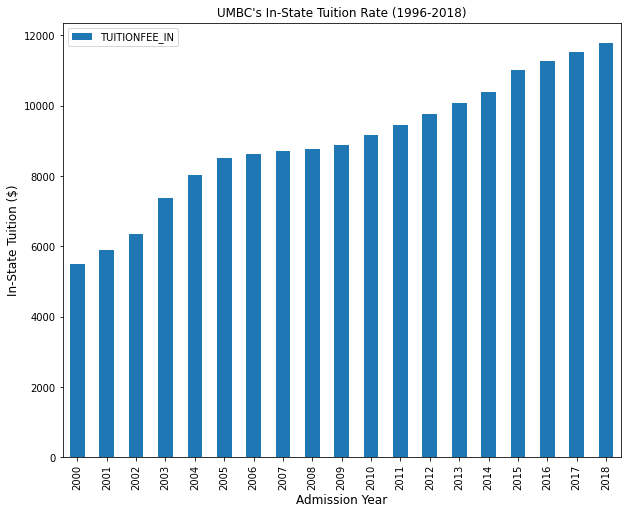

In [33]:
umbc_bar = clean_umbc.plot.bar(x = 'YEAR', y = 'TUITIONFEE_IN', figsize = (10,8))

plt.title("UMBC's In-State Tuition Rate (1996-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("In-State Tuition ($)", fontsize=12)
plt.show()

#### Display UMBC's in-state tuition in a line chart

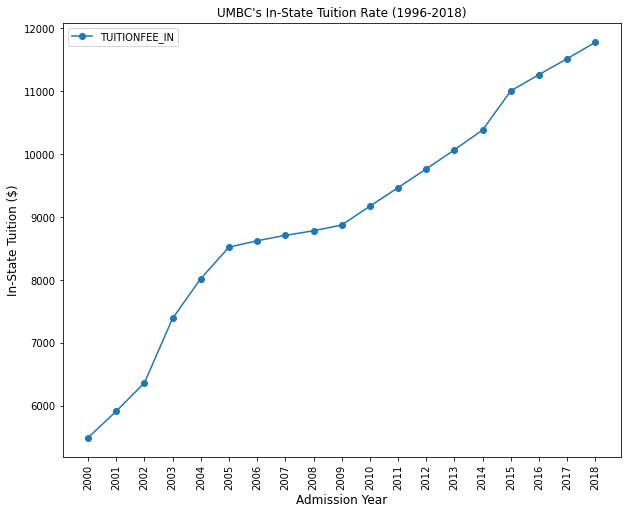

In [34]:
umbc_line = clean_umbc.plot.line('YEAR', 'TUITIONFEE_IN', marker = 'o', figsize = (10,8))

plt.xticks(clean_umbc['YEAR'], rotation = 90)
plt.title("UMBC's In-State Tuition Rate (1996-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("In-State Tuition ($)", fontsize=12)
plt.show()

#### Calculate UMBC tuition change percentage per year

percentage of yearly tuition change = [(current year - last year) / last year] * 100 

In [35]:
# convert TUITIONFEE_IN column into a list

umbc_tuition = clean_umbc['TUITIONFEE_IN'].tolist()

umbc_tuition

[5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

In [36]:
# calculate the percentage of yearly change in tuition

umbc_change = []
umbc_change.append(0) # value for first year

for x in range(1, len(umbc_tuition)):
    umbc_last = umbc_tuition[x-1]
    umbc_current = umbc_tuition[x]
    umbc_percent = ((umbc_current - umbc_last) / umbc_last) * 100
    umbc_change.append(umbc_percent)
    
umbc_change

[0,
 7.650273224043716,
 7.648054145516074,
 16.12700408676517,
 8.554412560909583,
 6.234413965087282,
 1.1971830985915493,
 0.9974483878450475,
 0.8268259072117593,
 1.0478359908883828,
 3.370153291253381,
 3.227565151019518,
 3.1372134783986483,
 3.11347808275297,
 3.1386571315057608,
 5.989984591679507,
 2.344175904052335,
 2.254971590909091,
 2.2573363431151243]

In [37]:
# round up values to 2 decimal points

umbc_round = [round(i, 2) for i in umbc_change]

umbc_round

[0,
 7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

#### Add percentage of yearly change in tuition to the dataframe

In [38]:
clean_umbc['PCT_CHANGE'] = umbc_round

clean_umbc

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
0,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,5490.0,2000,0.00
1,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6551,5910.0,2001,7.65
2,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6327,6362.0,2002,7.65
3,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.5757,7388.0,2003,16.13
4,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7014,8020.0,2004,8.55
5,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7143,8520.0,2005,6.23
6,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7153,8622.0,2006,1.20
7,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6895,8708.0,2007,1.00
8,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.7174,8780.0,2008,0.83
9,163268,University of Maryland-Baltimore County,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.6890,8872.0,2009,1.05


#### Display UMBC Tuition Change with Visualizations

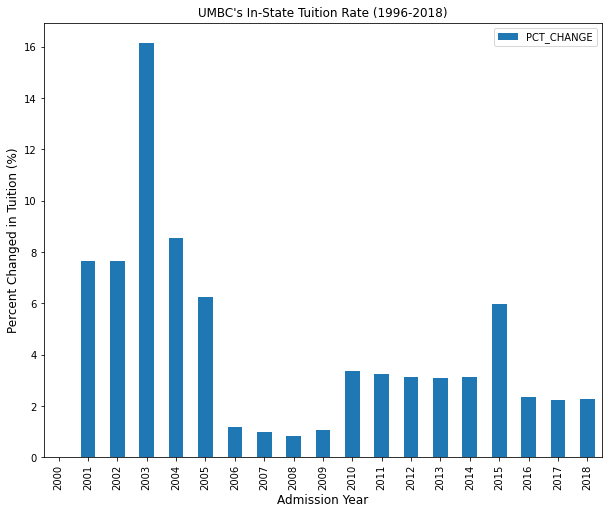

In [39]:
umbc_bar2 = clean_umbc.plot.bar(x = 'YEAR', y = 'PCT_CHANGE', figsize = (10,8))

plt.title("UMBC's In-State Tuition Rate (1996-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("Percent Changed in Tuition (%)", fontsize=12)

plt.show()

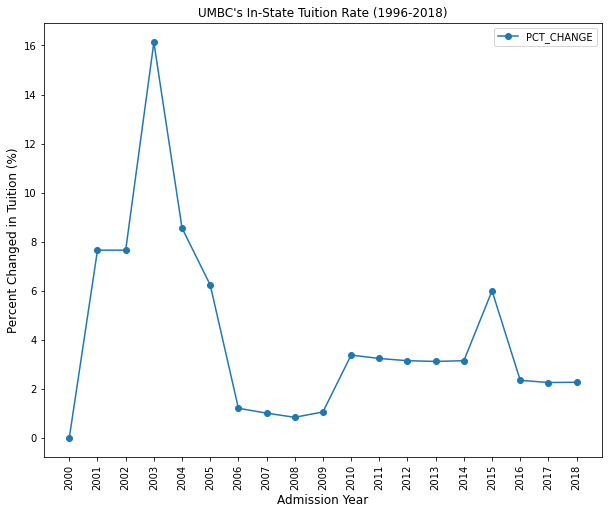

In [40]:
umbc_line2 = clean_umbc.plot.line('YEAR', 'PCT_CHANGE', marker = 'o', figsize = (10,8))

plt.xticks(clean_umbc['YEAR'], rotation = 90)
plt.title("UMBC's In-State Tuition Rate (1996-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("Percent Changed in Tuition (%)", fontsize=12)
plt.show()

### Create function of yearly percentage change 

In [41]:
def pct_change(x):
    tuition_change = []
    tuition_change.append(0) # value for first year

    for a in range(1, len(x)):
        last_tuition = x[a-1]
        current_tuition = x[a]
        percent_change = ((current_tuition - last_tuition) / last_tuition) * 100
        tuition_change.append(percent_change)
        tuition_round = [round(i, 2) for i in tuition_change]

    return tuition_round

### Create JHU Dataframe

In [42]:
# search for JHU

df[df['INSTNM'] == 'JHU']

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR


In [43]:
# search for all univerities with 'Hopkins' in the name

df[df['INSTNM'].str.contains('Hopkins')]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1046,135294,Lindsey Hopkins Technical College,FL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
1879,156860,Hopkinsville Community College,KY,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
2139,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
6914,421513,Ross College-Hopkinsville,KY,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1996
981,135294,Lindsey Hopkins Technical College,FL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,1997
...,...,...,...,...,...,...,...
4630,421513,Ross College-Hopkinsville,KY,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,2017
688,135294,Lindsey Hopkins Technical College,FL,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,NaN,2018
1260,156860,Hopkinsville Community College,KY,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",NaN,4248.0,2018
1410,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.1148,53740.0,2018


In [44]:
# display only JHU data based on university ID

jhu = df[df['UNITID'] == 162928]

jhu

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,24930.0,2000
1906,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.3431,26210.0,2001
1884,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.3506,27390.0,2002
1865,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.3060,28730.0,2003
1823,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.3071,30140.0,2004
1812,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.3509,31620.0,2005


In [45]:
# number of jhu records

print('Number of JHU records:', jhu.shape[0])

Number of JHU records: 23


#### Drop all rows with null values

In [46]:
# check for null values for JHU data

jhu.isna().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [47]:
# display data with null admission rate 

jhu[jhu['ADM_RATE'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,24930.0,2000


In [48]:
# display data with null in-state tuition rate 

jhu[jhu['TUITIONFEE_IN'].isnull()]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,NaN,1999


In [49]:
# drop all records without admission rate 

clean_jhu = jhu.dropna(subset=['TUITIONFEE_IN']).reset_index(drop = True)

clean_jhu.shape

(19, 7)

### Display JHU Data

#### Display a bar and line chart of the JHU's tuition
- JHU data between 1996 to 1999 were dropped because in-state tuition fees were null.


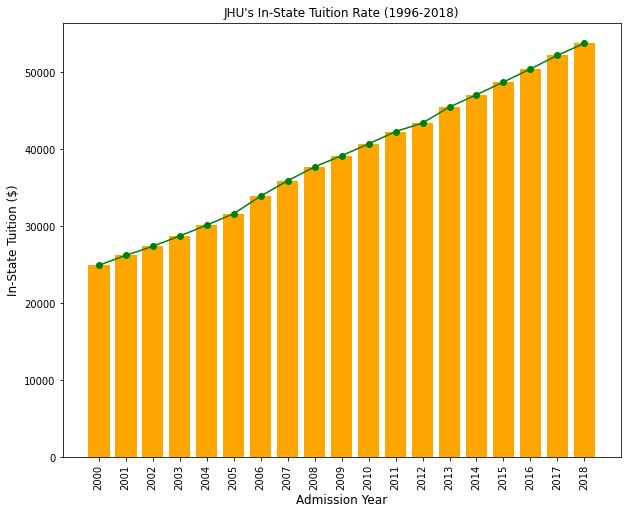

In [61]:
plt.figure(figsize=(10,8))
plt.bar(clean_jhu['YEAR'], clean_jhu['TUITIONFEE_IN'], color = 'orange')
plt.plot(clean_jhu['YEAR'], clean_jhu['TUITIONFEE_IN'], '-o', color='green')

plt.xticks(clean_jhu['YEAR'], rotation = 90)
plt.title("JHU's In-State Tuition Rate (1996-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("In-State Tuition ($)", fontsize=12)

plt.show()

#### Calculate JHU tuition change percentage per year

In [51]:
# convert TUITIONFEE_IN column into a list

jhu_tuition = clean_jhu['TUITIONFEE_IN'].tolist()

jhu_tuition

[24930.0,
 26210.0,
 27390.0,
 28730.0,
 30140.0,
 31620.0,
 33900.0,
 35900.0,
 37700.0,
 39150.0,
 40680.0,
 42280.0,
 43390.0,
 45470.0,
 47060.0,
 48710.0,
 50410.0,
 52170.0,
 53740.0]

In [52]:
# calculate the percentage of yearly change in tuition

jhu_round = pct_change(jhu_tuition)

jhu_round

[0,
 5.13,
 4.5,
 4.89,
 4.91,
 4.91,
 7.21,
 5.9,
 5.01,
 3.85,
 3.91,
 3.93,
 2.63,
 4.79,
 3.5,
 3.51,
 3.49,
 3.49,
 3.01]

#### Add percentage of yearly change in tuition to the dataframe

In [53]:
clean_jhu['PCT_CHANGE'] = jhu_round

clean_jhu

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
0,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",NaN,24930.0,2000,0.00
1,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.3431,26210.0,2001,5.13
2,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.3506,27390.0,2002,4.50
3,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.3060,28730.0,2003,4.89
4,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.3071,30140.0,2004,4.91
5,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.3509,31620.0,2005,4.91
6,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.2792,33900.0,2006,7.21
7,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.2571,35900.0,2007,5.90
8,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.2609,37700.0,2008,5.01
9,162928,Johns Hopkins University,MD,"Mid East (DE, DC, MD, NJ, NY, PA)",0.2782,39150.0,2009,3.85


### Display bar plot of JHU percentage changes tuition over the years

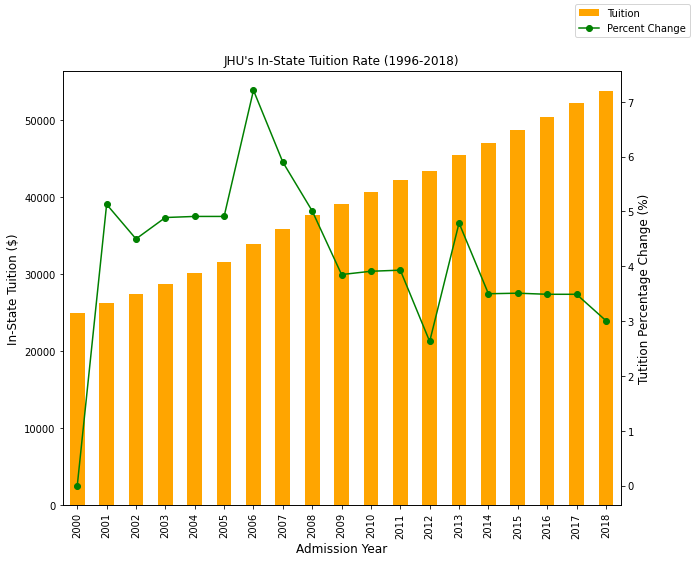

In [54]:
fig = plt.figure(figsize=(10,8))

ax = clean_jhu['TUITIONFEE_IN'].plot(kind="bar", color = 'orange', label = 'Tuition')
ax2 = ax.twinx()
ax2.plot(clean_jhu['PCT_CHANGE'],marker='o', color = 'green', label = 'Percent Change')

ax.set_xticklabels(clean_jhu['YEAR'])

plt.title("JHU's In-State Tuition Rate (1996-2018)")
ax.set_xlabel("Admission Year", fontsize=12)
ax.set_ylabel('In-State Tuition ($)',  fontsize=12)
ax2.set_ylabel('Tutition Percentage Change (%)',  fontsize=12)
fig.legend(loc="upper right")

plt.show()

### Merge UMBC and JHU data

#### 1) Create UMBC dataframe with Year and PCT_CHANGE columns
- Rename PCT_CHANGE column to UMBC_PCT column

In [55]:
umbc2 = clean_umbc[['YEAR', 'PCT_CHANGE']].copy().rename(columns={"PCT_CHANGE": "UMBC_PCT"})

umbc2

,YEAR,UMBC_PCT
0,2000,0.00
1,2001,7.65
2,2002,7.65
3,2003,16.13
4,2004,8.55
5,2005,6.23
6,2006,1.20
7,2007,1.00
8,2008,0.83
9,2009,1.05


#### 2) Create JHU dataframe with Year and PCT_CHANGE columns
- Rename PCT_CHANGE column to JHU_PCT column

In [56]:
jhu2 = clean_jhu[['YEAR', 'PCT_CHANGE']].copy().rename(columns={"PCT_CHANGE": "JHU_PCT"})

jhu2

,YEAR,JHU_PCT
0,2000,0.00
1,2001,5.13
2,2002,4.50
3,2003,4.89
4,2004,4.91
5,2005,4.91
6,2006,7.21
7,2007,5.90
8,2008,5.01
9,2009,3.85


#### 3) Merge UMBC and JHU dataframes

In [57]:
merged_df = pd.merge(left = umbc2, right =jhu2, left_on = 'YEAR', right_on = 'YEAR')

merged_df

,YEAR,UMBC_PCT,JHU_PCT
0,2000,0.00,0.00
1,2001,7.65,5.13
2,2002,7.65,4.50
3,2003,16.13,4.89
4,2004,8.55,4.91
5,2005,6.23,4.91
6,2006,1.20,7.21
7,2007,1.00,5.90
8,2008,0.83,5.01
9,2009,1.05,3.85


### Compare In-State Tuition of UMBC and JHU

<AxesSubplot:xlabel='YEAR'>

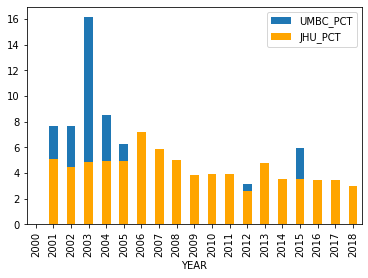

In [58]:
# plot both universities together - this does not work because the bars overlap

ax = plt.gca()

merged_df.plot(kind='bar', x = 'YEAR', y = 'UMBC_PCT', ax = ax)
merged_df.plot(kind='bar', x = 'YEAR', y = 'JHU_PCT', color ='orange', ax=ax)

Text(0, 0.5, 'Tutition Percentage Change (%)')

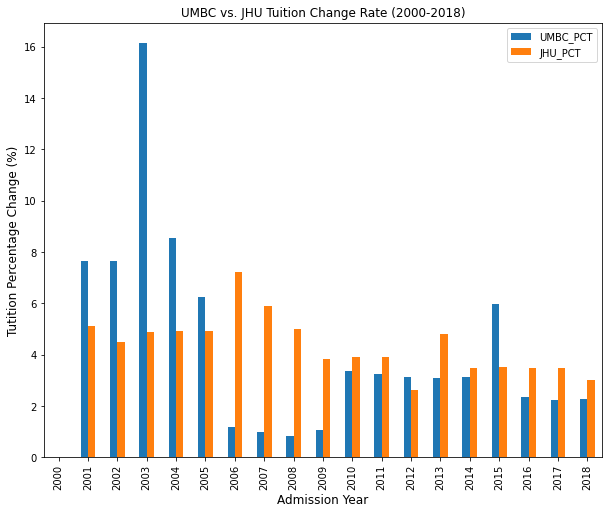

In [59]:
# display UMBC and JHU side by side on a bar chart 

merged_df.plot(x = 'YEAR', y = ['UMBC_PCT', 'JHU_PCT'], kind="bar", figsize = (10,8))

plt.title("UMBC vs. JHU Tuition Change Rate (2000-2018)")
plt.xlabel("Admission Year", fontsize=12)
plt.ylabel("Tutition Percentage Change (%)", fontsize=12)

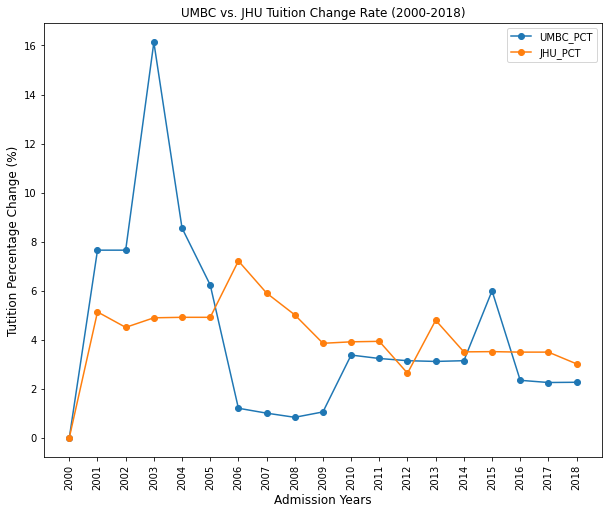

In [60]:
# display UMBC and JHU on multi-line line chart

merged_df.plot(x = "YEAR", y =["UMBC_PCT","JHU_PCT"], marker = 'o', figsize = (10,8))

plt.xticks(clean_jhu['YEAR'], rotation = 90)
plt.title("UMBC vs. JHU Tuition Change Rate (2000-2018)")
plt.xlabel("Admission Years", fontsize=12)
plt.ylabel("Tutition Percentage Change (%)", fontsize=12)

plt.show()

### Analysis

#### UMBC
- UMBC's tuition increased the most between 2002 - 2003, when the tuition increased by 16.13%.
- UMBC's tuition decreased the most between 2003 - 2004, when the tuition decreased by 8.55%

#### JHU 
- JHU's tuition increased the most between 2005 - 2006, when the tuition increased by 7.21%
- JHU's tuition decreased the most between 2006 - 2007, when the tuition decreased by 5.90%

#### Comparison
- The tuition was most volatile between 2000 - 2010. The percentages fluctuated more than between 2011 - 2018. 
- Starting 2010, the tuition percentage of increase steadily increased between 2% - 3% 